# 2048 (30pts)

by [Dipsy](https://github.com/dipsywong98)

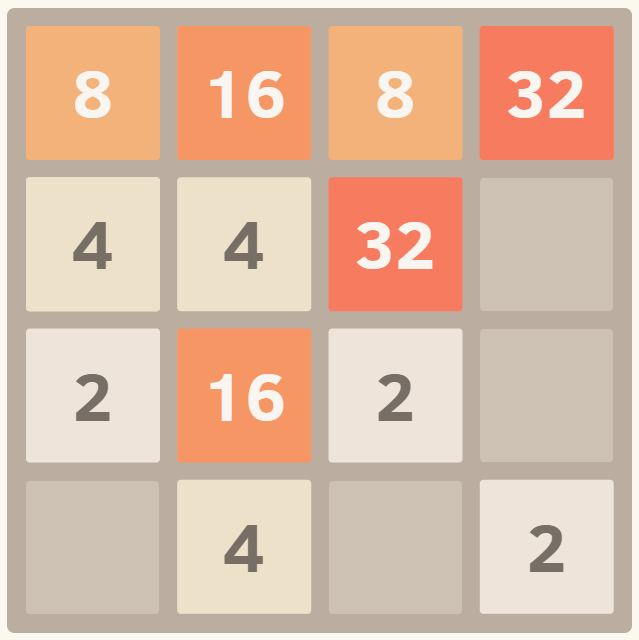

https://play2048.co/

## Introduction

2048 is an interesting game, why not make our own in Python?!

In this Jupyter Notebook, we will guide you to build all the essential parts in a 2048 game and assemble all of them, and at last, we will have our playable 2048 game!

## Step 0 - Utility functions

First, we will need to initialize the following utility functions to help us run tests - to ensure we implement our logic correctly!

We implemented them for you, and you may study their internal logic if you are interested

In [2]:
import unittest
from utils import (
    FreezedParam,
    grade_test,
    grade_tests,
    assert_eq,
    assert_next_grid,
    assert_next_state,
    create_empty_row,
    create_empty_grid,
    flatten,
    filterna
)
from queue import Queue

## Step 1 - handle the merge left operation on a row

In a 2048 game, we can use a 2D array of integers to represent the 4x4 game grid, and we use `None` to denote there is no number in the cell. For example,

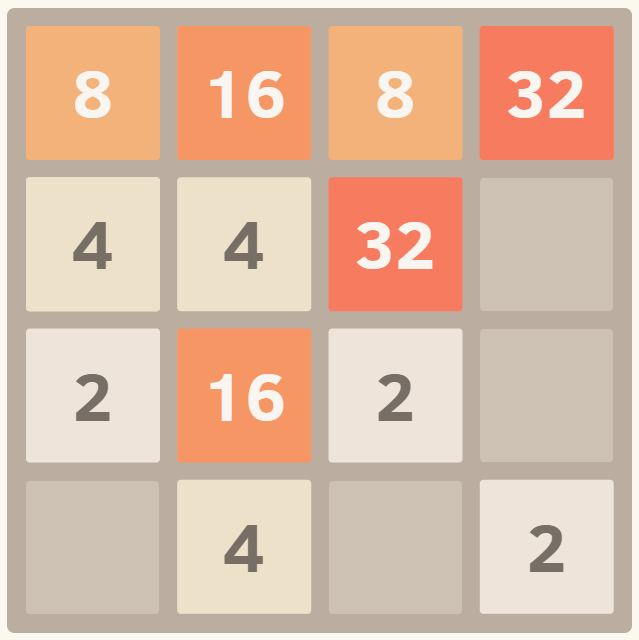

can be represented with

```python
grid = [
  [8, 16, 8, 32],
  [4, 4, 32, None],
  [2, 16, 2, None],
  [None, 4, None, 2],
]

```

Now let's work on the most fundamental procedure in 2048 - merging numbers on a single row during swipe left, we call this procedure `merge_row_left`. When merging left, all numbers will move towards the left, and neighboring identical numbers will merge by adding their values! Pay attention to those edge cases as well!

### `merge_row_left(row)`

* `row` is a single row in the 2048 grid
* it should return the new row after merging to the left
* You should not alter `row` and you should operate on a new copy if you want to change its value (and a high quality function implementation should not alter its parameters)

<details>
<summary>hint 1</summary>
You can select only the non-None elements and do the merging, and then put back the None's until the new row is of length 4
</details>

<details>
<summary>hint 2</summary>
use queue pop and top concept to check if the next number is mergeable
</details>

<details>
<summary>hint 3</summary>
One working algorithm works as follows:

1. create an empty array `new_row` which will be the result of the function
2. get all non-empty numbers in the row, store them in an array `non_empty`
3. treat `non_empty` as a queue. while it is non-empty, pop the front as `current`, and compare it with the new front element in the queue. If they are the same, means we need to merge them, we need to pop the new front and append the merged result to `new_row`. Otherwise, we can just append the `current` to `new_row`.
4. append None to the `new_row` array until it becomes length 4
</details>

In [3]:
def pad_row(row, size):
    while (size - len(row)) > 0:
        row.append(None)
    return row

def merge_row_left(row):
    # your implementation here
    new_row = []
    not_empty_queue = []
    print("row ", row)
    for i in row:
        if (i != None):
            not_empty_queue.append(i)
    print("queue", not_empty_queue)
    while len(not_empty_queue) > 0:
        first_in_queue = not_empty_queue.pop(0)
        if len(not_empty_queue) > 0 and first_in_queue == not_empty_queue[0]:
            second_in_queue = not_empty_queue.pop(0)
            new_row.append(first_in_queue + second_in_queue)
        else:
            new_row.append(first_in_queue)
    new_row = pad_row(new_row, 4)
    print(new_row)
    return new_row

class TestMergeRowLeft(unittest.TestCase):
    def test_numbers_should_become_left_packed(self):
        with FreezedParam([None, 2, None, 4]) as row:
            self.assertEqual(merge_row_left(row), [2, 4, None, None])

    def test_same_neighboring_number_should_merge_sparse(self):
        with FreezedParam([None, 2, None, 2]) as row:
            self.assertEqual(merge_row_left(row), [4, None, None, None])

    def test_same_neighboring_number_should_merge_dense(self):
        with FreezedParam([2, 4, 4, 2]) as row:
            self.assertEqual(merge_row_left(row), [2, 8, 2, None])

    def test_empty_row_should_remain_empty(self):
        with FreezedParam([None, None, None, None]) as row:
            self.assertEqual(merge_row_left(row), [None, None, None, None])

    def test_full_non_mergeable_should_remain_same(self):
        with FreezedParam([2, 4, 2, 4]) as row:
            self.assertEqual(merge_row_left(row), [2, 4, 2, 4])

    def test_four_identical_should_merge_twice(self):
        with FreezedParam([2, 2, 2, 2]) as row:
            self.assertEqual(merge_row_left(row), [4, 4, None, None])

    def test_three_identical_should_merge_left_first(self):
        with FreezedParam([None, 2, 2, 2]) as row:
            self.assertEqual(merge_row_left(row), [4, 2, None, None])

    def test_merged_cell_will_not_merge_again_dense(self):
        with FreezedParam([2, 2, 4, None]) as row:
            self.assertEqual(merge_row_left(row), [4, 4, None, None])

    def test_merged_cell_will_not_merge_again_sparse(self):
        with FreezedParam([4, 2, None, 2]) as row:
            self.assertEqual(merge_row_left(row), [4, 4, None, None])

grade_test(TestMergeRowLeft)

row  [None, None, None, None]
queue []
[None, None, None, None]
row  [2, 2, 2, 2]
queue [2, 2, 2, 2]
[4, 4, None, None]
row  [2, 4, 2, 4]
queue [2, 4, 2, 4]
[2, 4, 2, 4]
row  [2, 2, 4, None]
queue [2, 2, 4]
[4, 4, None, None]
row  [4, 2, None, 2]
queue [4, 2, 2]
[4, 4, None, None]
row  [None, 2, None, 4]
queue [2, 4]
[2, 4, None, None]
row  [2, 4, 4, 2]
queue [2, 4, 4, 2]
[2, 8, 2, None]
row  [None, 2, None, 2]
queue [2, 2]
[4, None, None, None]
row  [None, 2, 2, 2]
queue [2, 2, 2]
[4, 2, None, None]


----------------------------------------------------------------------
Ran 9 tests in 0.006s

OK


Score of TestMergeRowLeft: 9/9 (100%)


## Step 2 - handle the merge left operation on the whole grid

Now we know how to handle merge in a row, we can apply merge_row_left on all the rows, that is the whole grid, then we produce a new grid on swiping left!

### `merge_grid_left(grid)`

* `grid` is the current 4x4 grid
* it should return the new grid after merging to the left

In [6]:
def merge_grid_left(grid):
    new_grid = []
    for row in grid:
        new_grid.append(merge_row_left(row))
    return new_grid

class TestMergeGridLeft(unittest.TestCase):
    def test_case1(self):
        with FreezedParam([
            [None, 2, None, 4],
            [None, 2, None, 2],
            [2, 4, 4, 2],
            [None, None, None, None],
        ]) as grid:
            self.assertEqual(merge_grid_left(grid), [
                [2, 4, None, None],
                [4, None, None, None],
                [2, 8, 2, None],
                [None, None, None, None]
            ])
    def test_case_2(self):
        with FreezedParam([
            [None, 4, None, 8],
            [None, 4, None, 4],
            [4, 8, 8, 4],
            [None, None, None, None],
        ]) as grid:
            self.assertEqual(merge_grid_left(grid), [
                [4, 8, None, None],
                [8, None, None, None],
                [4, 16, 4, None],
                [None, None, None, None]
            ])
    def test_case_3(self):
        with FreezedParam([
            [2, None, 2, None],
            [None, 2, None, 2],
            [2, None, 2, None],
            [None, 2, None, 2],
        ]) as grid:
            self.assertEqual(merge_grid_left(
                grid
            ), [
                    [4, None, None,None],
                    [4, None, None, None],
                    [4, None, None, None],
                    [4, None, None, None],
            ])
    def test_case_4(self):
        with FreezedParam([
            [2, 4, 2, 4],
            [4, 2, 4, 2],
            [2, 4, 2, 4],
            [4, 2, 4, 2],
        ]) as grid:
            self.assertEqual(merge_grid_left(
                grid
            ), [
                [2, 4, 2, 4],
                [4, 2, 4, 2],
                [2, 4, 2, 4],
                [4, 2, 4, 2],
            ])
    def test_case_5(self):
        with FreezedParam([
            [None, None, None, None],
            [None, None, None, None],
            [None, None, None, None],
            [None, None, None, None],
        ]) as grid:
            self.assertEqual(merge_grid_left(
                grid
            ), [
            [None, None, None, None],
            [None, None, None, None],
            [None, None, None, None],
            [None, None, None, None],
            ])

grade_test(TestMergeGridLeft)

row  [None, 2, None, 4]
queue [2, 4]
[2, 4, None, None]
row  [None, 2, None, 2]
queue [2, 2]
[4, None, None, None]
row  [2, 4, 4, 2]
queue [2, 4, 4, 2]
[2, 8, 2, None]
row  [None, None, None, None]
queue []
[None, None, None, None]
row  [None, 4, None, 8]
queue [4, 8]
[4, 8, None, None]
row  [None, 4, None, 4]
queue [4, 4]
[8, None, None, None]
row  [4, 8, 8, 4]
queue [4, 8, 8, 4]
[4, 16, 4, None]
row  [None, None, None, None]
queue []
[None, None, None, None]
row  [2, None, 2, None]
queue [2, 2]
[4, None, None, None]
row  [None, 2, None, 2]
queue [2, 2]
[4, None, None, None]
row  [2, None, 2, None]
queue [2, 2]
[4, None, None, None]
row  [None, 2, None, 2]
queue [2, 2]
[4, None, None, None]
row  [2, 4, 2, 4]
queue [2, 4, 2, 4]
[2, 4, 2, 4]
row  [4, 2, 4, 2]
queue [4, 2, 4, 2]
[4, 2, 4, 2]
row  [2, 4, 2, 4]
queue [2, 4, 2, 4]
[2, 4, 2, 4]
row  [4, 2, 4, 2]
queue [4, 2, 4, 2]
[4, 2, 4, 2]
row  [None, None, None, None]
queue []
[None, None, None, None]
row  [None, None, None, None]
queue

----------------------------------------------------------------------
Ran 5 tests in 0.010s

OK


Score of TestMergeGridLeft: 5/5 (100%)


## Step 3 - handle the merge right operation

We have our experience in handling merge left, shall we do merge right?

### `merge_row_right(row)`

* `row` is a single row in the 2048 grid
* it should return the new row after merging to the right

<details>
<summary>hint 1</summary>
Can we reuse the `merge_row_left` function?
</details>

<details>
<summary>hint 2</summary>
Use reverse
</details>

<details>
<summary>hint 3</summary>
Take we are merging right on [2, None, 2, 4] as an example, the result should be [None, None, 4, 4]. if we reverse the row, it becomes [4, 2, None, 2], then merging left on this will be [4, 4, None, None], which is the same as the reverse of the original problem.
</details>


In [ ]:
def merge_row_right(row):
    # your implementation here
    return row

class TestMergeRowRight(unittest.TestCase):
    def test_numbers_should_become_right_packed(self):
        with FreezedParam([None, 2, None, 4]) as row:
            self.assertEqual(merge_row_right(row), [None, None, 2, 4])

    def test_same_neighboring_number_should_merge_sparse(self):
        with FreezedParam([None, 2, None, 2]) as row:
            self.assertEqual(merge_row_right(row), [None, None, None, 4])

    def test_same_neighboring_number_should_merge_dense(self):
        with FreezedParam([2, 4, 4, 2]) as row:
            self.assertEqual(merge_row_right(row), [None, 2, 8, 2])

    def test_empty_row_should_remain_empty(self):
        with FreezedParam([None, None, None, None]) as row:
            self.assertEqual(merge_row_right(row), [None, None, None, None])

    def test_full_non_mergeable_should_remain_same(self):
        with FreezedParam([2, 4, 2, 4]) as row:
            self.assertEqual(merge_row_right(row), [2, 4, 2, 4])

    def test_four_identical_should_merge_twice(self):
        with FreezedParam([2, 2, 2, 2]) as row:
            self.assertEqual(merge_row_right(row), [None, None, 4, 4])

    def test_three_identical_should_merge_right_first(self):
        with FreezedParam([None, 2, 2, 2]) as row:
            self.assertEqual(merge_row_right(row), [None, None, 2, 4])

    def test_merged_cell_will_not_merge_again_dense(self):
        with FreezedParam([2, 2, 4, None]) as row:
            self.assertEqual(merge_row_right(row), [None, None, 4, 4])

    def test_merged_cell_will_not_merge_again_sparse(self):
        with FreezedParam([4, 2, None, 2]) as row:
            self.assertEqual(merge_row_right(row), [None, None, 4, 4])

grade_test(TestMergeRowRight)

### `merge_grid_right(grid)`

* `grid` is the current 4x4 grid
* it should return the new grid after merging to the right

In [ ]:
def merge_grid_right(grid):
    # your implementation here
    return grid

class TestMergeGridRight(unittest.TestCase):
    def test_case_1(self):
        with FreezedParam([
            [None, 2, None, 4],
            [None, 2, None, 2],
            [2, 4, 4, 2],
            [None, None, None, None],
        ]) as grid:
            self.assertEqual(merge_grid_right(grid), [
                [None, None, 2, 4],
                [None, None, None, 4],
                [None, 2, 8, 2],
                [None, None, None, None]
            ])
    def test_case_2(self):
        with FreezedParam([
            [None, 4, None, 8],
            [None, 4, None, 4],
            [4, 8, 8, 4],
            [None, None, None, None],
        ]) as grid:
            self.assertEqual(merge_grid_right(grid), [
                [None, None, 4, 8],
                [None, None, None, 8],
                [None, 4, 16, 4],
                [None, None, None, None]
            ])
    def test_case_3(self):
        with FreezedParam([
            [2, None, 2, None],
            [None, 2, None, 2],
            [2, None, 2, None],
            [None, 2, None, 2],
        ]) as grid:
            self.assertEqual(merge_grid_right(
                grid
            ), [
                    [None, None, None, 4],
                    [None, None, None, 4],
                    [None, None, None, 4],
                    [None, None, None, 4],
            ])
    def test_case_4(self):
        with FreezedParam([
            [2, 4, 2, 4],
            [4, 2, 4, 2],
            [2, 4, 2, 4],
            [4, 2, 4, 2],
        ]) as grid:
            self.assertEqual(merge_grid_right(
                grid
            ), [
                [2, 4, 2, 4],
                [4, 2, 4, 2],
                [2, 4, 2, 4],
                [4, 2, 4, 2],
            ])
    def test_case_5(self):
        with FreezedParam([
            [None, None, None, None],
            [None, None, None, None],
            [None, None, None, None],
            [None, None, None, None],
        ]) as grid:
            self.assertEqual(merge_grid_right(
                grid
            ), [
            [None, None, None, None],
            [None, None, None, None],
            [None, None, None, None],
            [None, None, None, None],
            ])

grade_test(TestMergeGridRight)

## Step 4 - handle the merge up and merge down operation

Now implement the merge up and merge down function.


### `merge_grid_up(grid)`

* `grid` is the current 4x4 grid
* it should return the new grid after merging up

<details>
<summary>hint 1</summary>
Can we reuse the `merge_grid_left` and `merge_grid_right` functions?
</details>

<details>
<summary>hint 2</summary>
Use transpose. Transpose is reflecting the grid along the diagonal axis. It can change a 2d array from a row-major into a column-major representation. That means each column in the original grid is now a row in the new grid.

And if we do transpose on a transposed grid, we can get the original grid.

You can use the following snippet to start coding your transpose function

```python
def transpose(grid):
    # your implementation here
    return grid

with FreezedParam([
    [1, 2, 3, 4],
    [5, 6, 7, 8],
    [9, 10, 11, 12],
    [13, 14, 15, 16],
]) as grid:
    assert_eq(transpose(grid), [
        [1, 5, 9, 13],
        [2, 6, 10, 14],
        [3, 7, 11, 15],
        [4, 8, 12, 16],
    ])
```


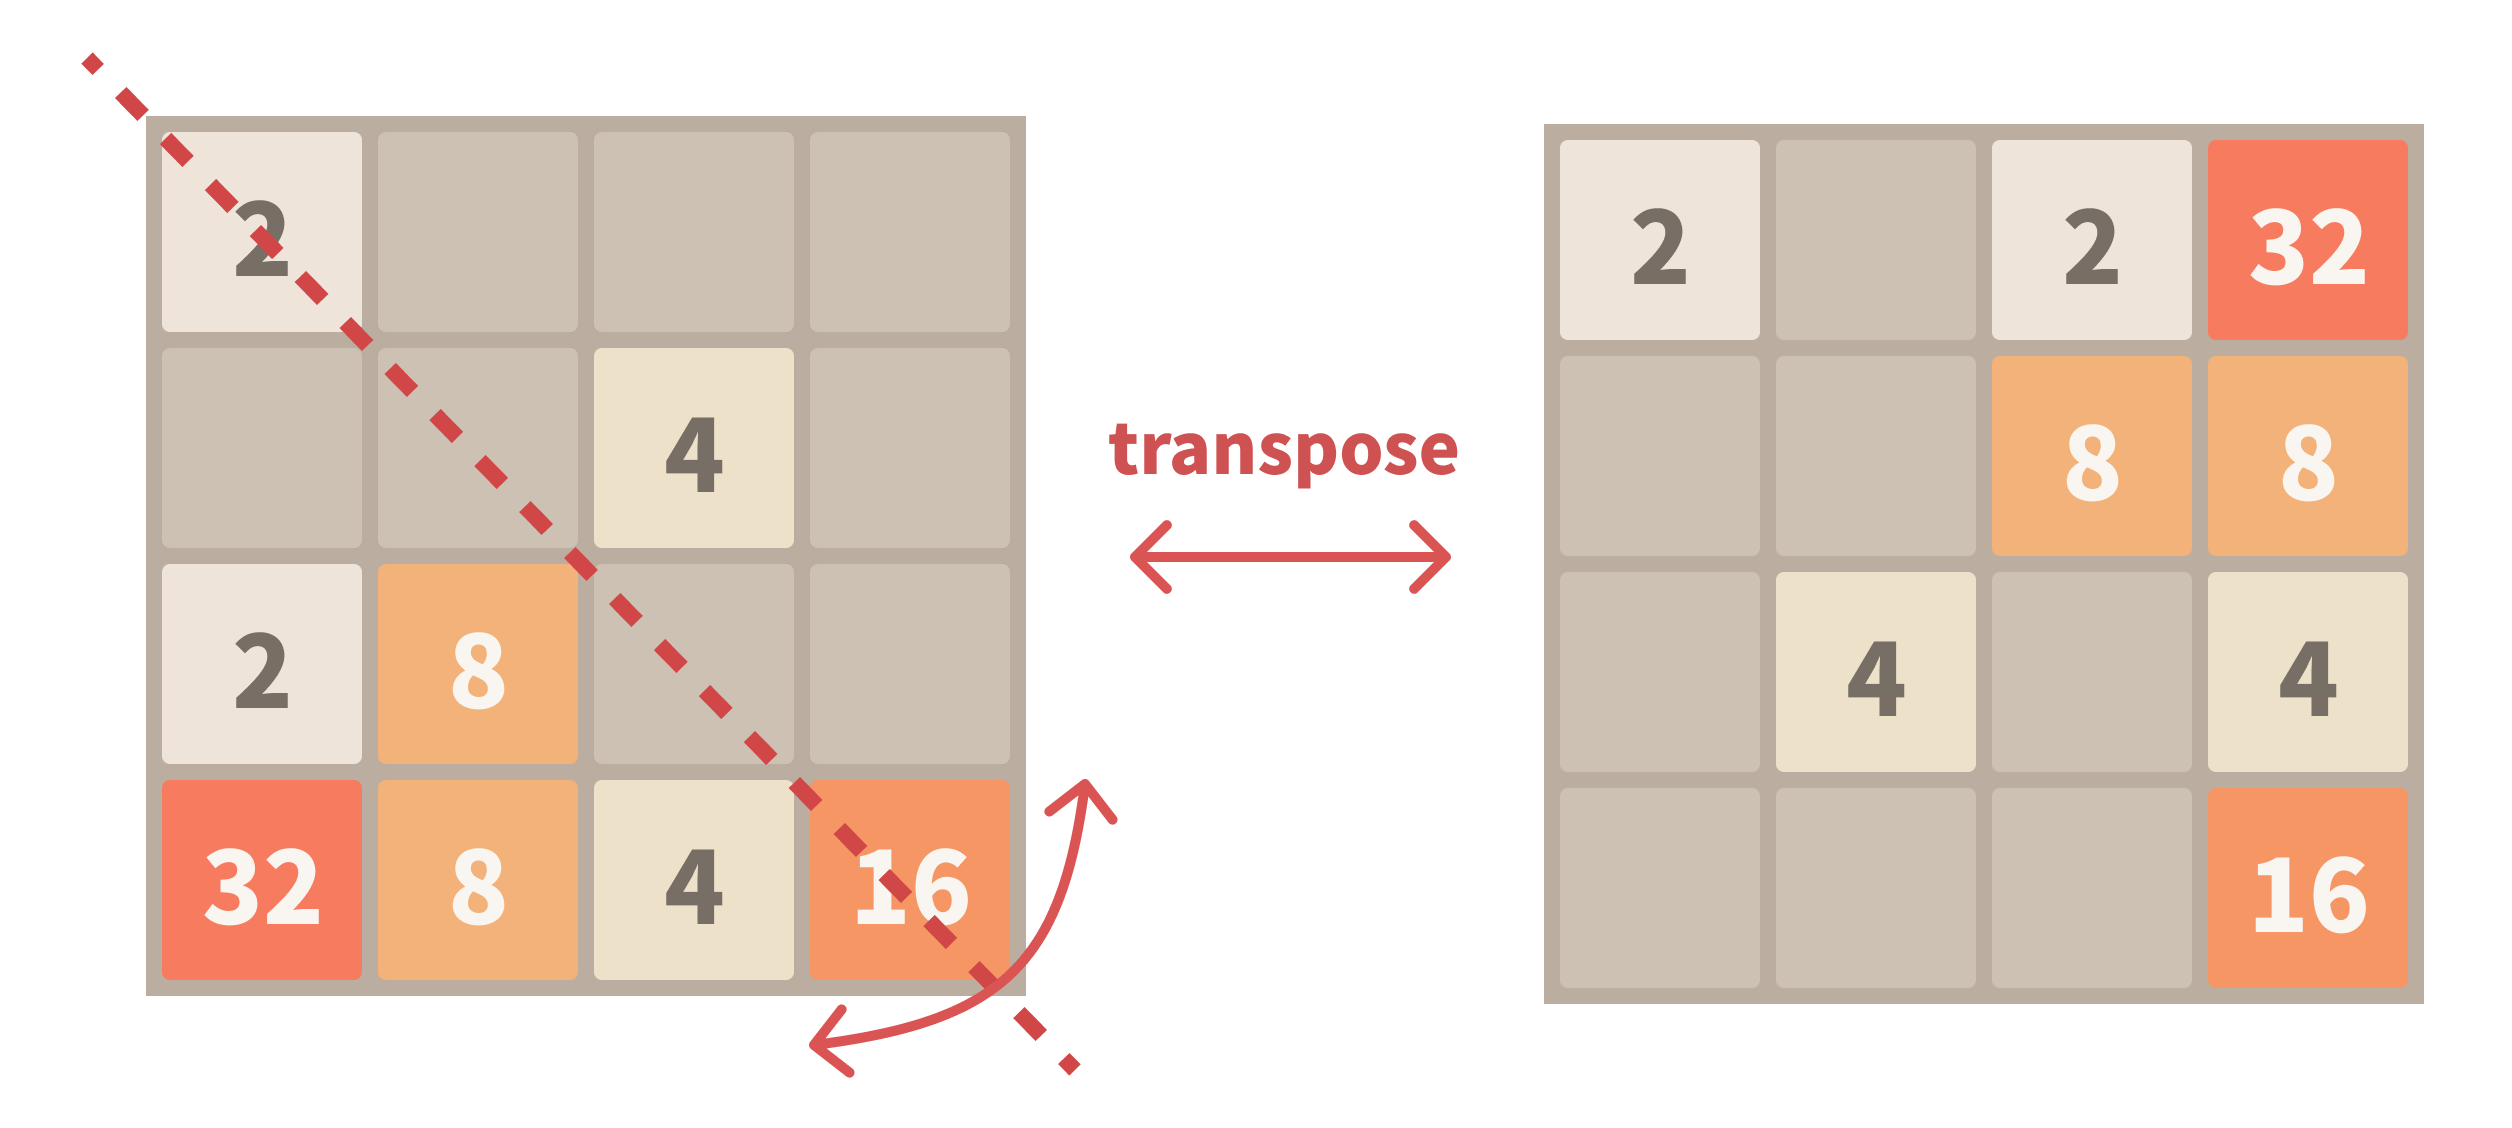
</details>

<details>
<summary>hint 3</summary>
Considering we are doing merge up, that is merging up for each column. If we transpose the original grid, what does the merging look like?
</details>

<details>
<summary>hint 4</summary>

Transpose transformed the problem from merging up to merging left. As the result is transposed compared to the expected result, we can transpose again to get back the expected grid.

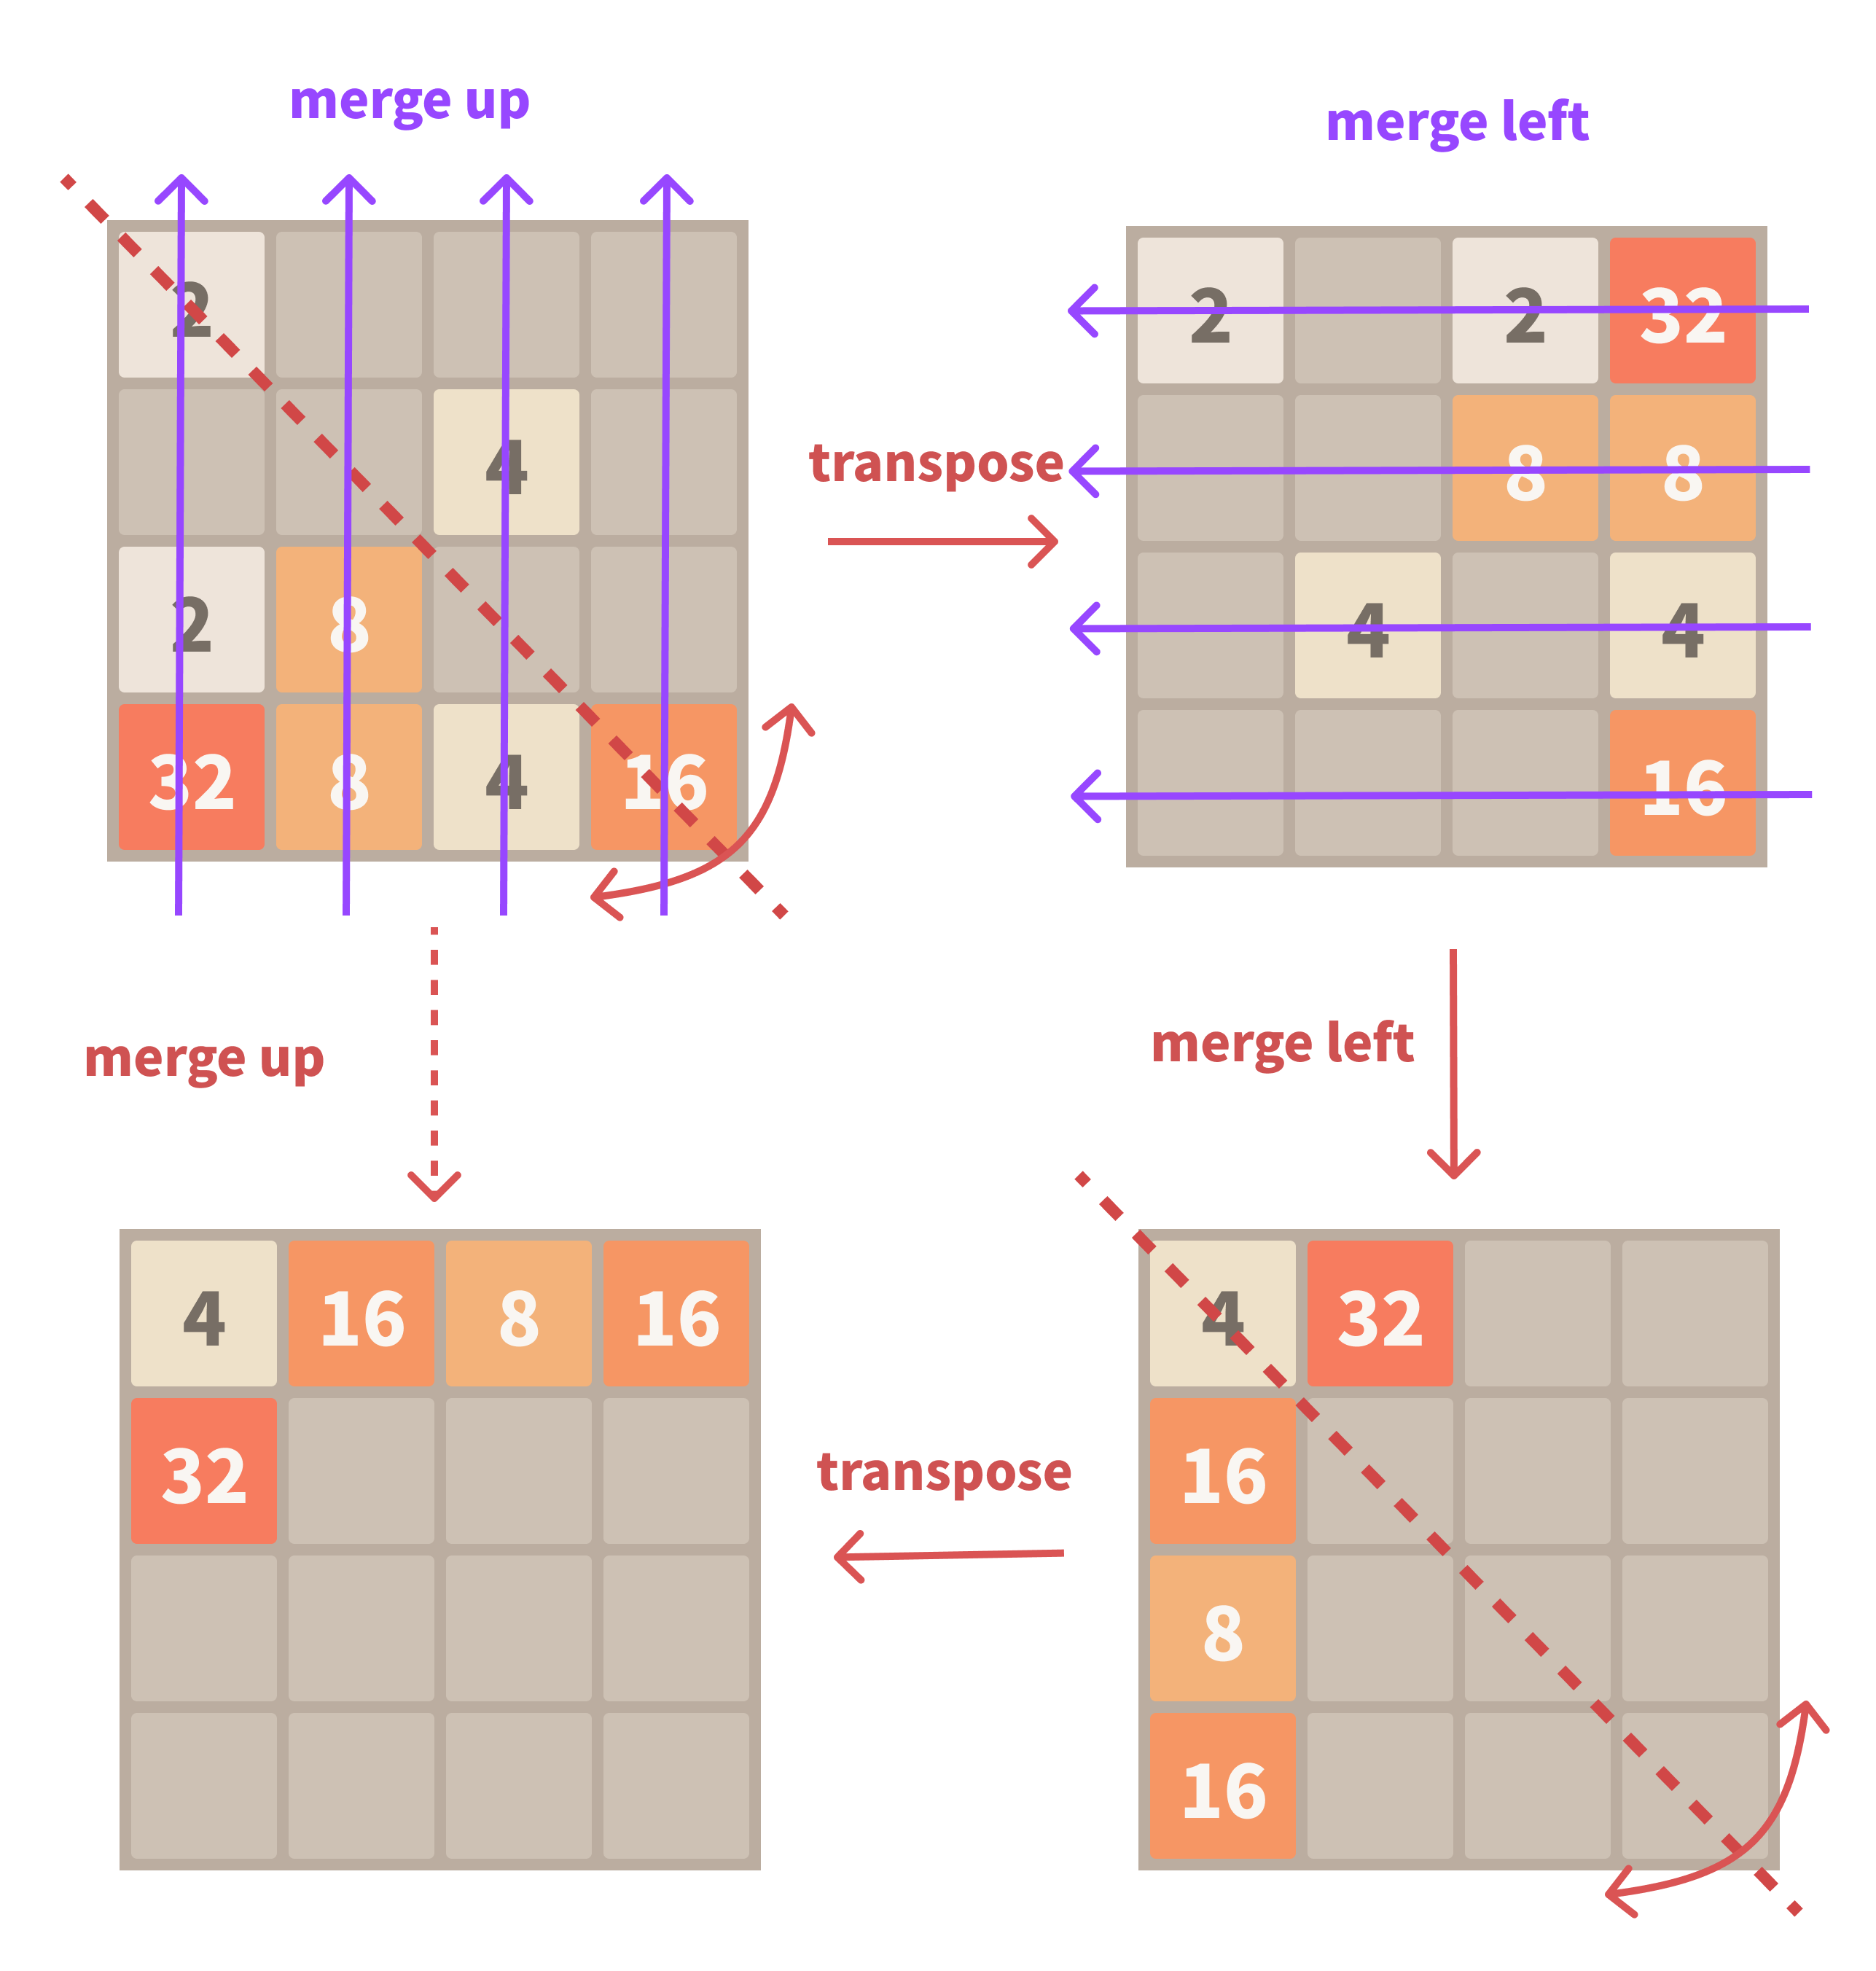
</details>


<details>
<summary>hint 5</summary>

If transpose is too difficult to understand for you, you can reuse the same thinking of using a queue like implementing merge_left, just instead of putting row data into a queue, you put column data into a queue.
</details>

In [ ]:
def transpose(grid):
    return [[grid[row][col] for row in range(len(grid))] for col in range(len(grid[0]))]

with FreezedParam([
    [1, 2, 3, 4],
    [5, 6, 7, 8],
    [9, 10, 11, 12],
    [13, 14, 15, 16],
]) as grid:
    assert_eq(transpose(grid), [
        [1, 5, 9, 13],
        [2, 6, 10, 14],
        [3, 7, 11, 15],
        [4, 8, 12, 16],
    ])

with FreezedParam([
    [1, 5, 9, 13],
    [2, 6, 10, 14],
    [3, 7, 11, 15],
    [4, 8, 12, 16],
]) as grid:
    assert_eq(transpose(grid), [
        [1, 2, 3, 4],
        [5, 6, 7, 8],
        [9, 10, 11, 12],
        [13, 14, 15, 16],
    ])

In [ ]:
def merge_grid_up(grid):
    grid = 
    return grid

class TestMergeGridUp(unittest.TestCase):
    def test_case_1(self):
        with FreezedParam([
            [None, None, 2, 4],
            [2, 2, 2, 2],
            [None, None, 2, 2],
            [None, 2, 2, 2],
        ]) as grid:
            self.assertEqual(merge_grid_up(
                grid
            ), [
                    [2, 4, 4, 4],
                    [None, None, 4, 4],
                    [None, None, None, 2],
                    [None, None, None, None],
            ])
    def test_case_2(self):
        with FreezedParam([
            [None, None, 4, 8],
            [4, 4, 4, 4],
            [None, None, 4, 4],
            [None, 4, 4, 4],
        ]) as grid:
            self.assertEqual(merge_grid_up(
                grid
            ), [
                    [4, 8, 8, 8],
                    [None, None, 8, 8],
                    [None, None, None, 4],
                    [None, None, None, None],
            ])
    def test_case_3(self):
        with FreezedParam([
            [2, None, 2, None],
            [None, 2, None, 2],
            [2, None, 2, None],
            [None, 2, None, 2],
        ]) as grid:
            self.assertEqual(merge_grid_up(
                grid
            ), [
                    [4, 4, 4, 4],
                    [None, None, None, None],
                    [None, None, None, None],
                    [None, None, None, None],
            ])
    def test_case_4(self):
        with FreezedParam([
            [2, 4, 2, 4],
            [4, 2, 4, 2],
            [2, 4, 2, 4],
            [4, 2, 4, 2],
        ]) as grid:
            self.assertEqual(merge_grid_up(
                grid
            ), [
                [2, 4, 2, 4],
                [4, 2, 4, 2],
                [2, 4, 2, 4],
                [4, 2, 4, 2],
            ])
    def test_case_5(self):
        with FreezedParam([
            [None, None, None, None],
            [None, None, None, None],
            [None, None, None, None],
            [None, None, None, None],
        ]) as grid:
            self.assertEqual(merge_grid_up(
                grid
            ), [
            [None, None, None, None],
            [None, None, None, None],
            [None, None, None, None],
            [None, None, None, None],
            ])

grade_test(TestMergeGridUp)

### `merge_grid_down(grid)`

* `grid` is the current 4x4 grid
* it should return the new grid after merging down

In [ ]:
def merge_grid_down(grid):
    # your implementation here
    return grid

class TestMergeGridDown(unittest.TestCase):
    def test_case_1(self):
        with FreezedParam([
            [None, None, 2, 4],
            [2, 2, 2, 2],
            [None, None, 2, 2],
            [None, 2, 2, 2],
        ]) as grid:
            self.assertEqual(merge_grid_down(
                grid
            ), [
                    [None, None, None, None],
                    [None, None, None, 4],
                    [None, None, 4, 2],
                    [2, 4, 4, 4],
            ])
    def test_case_2(self):
        with FreezedParam([
            [None, None, 4, 8],
            [4, 4, 4, 4],
            [None, None, 4, 4],
            [None, 4, 4, 4],
        ]) as grid:
            self.assertEqual(merge_grid_down(
                grid
            ), [
                    [None, None, None, None],
                    [None, None, None, 8],
                    [None, None, 8, 4],
                    [4, 8, 8, 8],
            ])
    def test_case_3(self):
        with FreezedParam([
            [2, None, 2, None],
            [None, 2, None, 2],
            [2, None, 2, None],
            [None, 2, None, 2],
        ]) as grid:
            self.assertEqual(merge_grid_down(
                grid
            ), [
                    [None, None, None, None],
                    [None, None, None, None],
                    [None, None, None, None],
                    [4, 4, 4, 4],
            ])
    def test_case_4(self):
        with FreezedParam([
            [2, 4, 2, 4],
            [4, 2, 4, 2],
            [2, 4, 2, 4],
            [4, 2, 4, 2],
        ]) as grid:
            self.assertEqual(merge_grid_down(
                grid
            ), [
                [2, 4, 2, 4],
                [4, 2, 4, 2],
                [2, 4, 2, 4],
                [4, 2, 4, 2],
            ])
    def test_case_5(self):
        with FreezedParam([
            [None, None, None, None],
            [None, None, None, None],
            [None, None, None, None],
            [None, None, None, None],
        ]) as grid:
            self.assertEqual(merge_grid_down(
                grid
            ), [
            [None, None, None, None],
            [None, None, None, None],
            [None, None, None, None],
            [None, None, None, None],
            ])

grade_test(TestMergeGridDown)

## Step 5 - generate the next number

After swiping and merging the numbers, we should generate a `2` or a `4` at a random empty space. We can create a `generate_next_location` function to choose a coordinate for such a place. We should use `(rowid, colid)` format so that we can access the corresponding cell in `grid[rowid][colid]` format.


### `generate_next_location(grid)`

* `grid` is the current 4x4 grid
* it should return `(rowid, colid)` which is an `(int, int)` tuple, where `grid[rowid][colid]` is None

<details>
<summary>hint 1</summary>

`randint(a, b)` returns a random number between `a` and `b`, including `a` and `b`
</details>

In [ ]:
from random import randint

def generate_next_location(grid):
    # your implementation here
    return (0, 0)

class TestGenerateNextLocation(unittest.TestCase):
    def test_case1(self):
        with FreezedParam([
            create_empty_row(),
            [2, 2, 2, 2],
            create_empty_row(),
            [2, 2, 2, 2],
        ]) as grid1:
            for _ in range(3):
                self.assertEqual(generate_next_location(grid1)[0] % 2, 0)

    def test_case2(self):
        with FreezedParam([
            [2, 2, 2, 2],
            create_empty_row(),
            [2, 2, 2, 2],
            create_empty_row(),
        ]) as grid2:
            for _ in range(3):
                self.assertEqual(generate_next_location(grid2)[0] % 2, 1)

    def test_case3(self):
        with FreezedParam([
            [None, 2, None, 2],
            [None, 2, None, 2],
            [None, 2, None, 2],
            [None, 2, None, 2],
        ]) as grid3:
            for _ in range(3):
                self.assertEqual(generate_next_location(grid3)[1] % 2, 0)

    def test_case4(self):
        with FreezedParam([
            [2, None, 2, None],
            [2, None, 2, None],
            [2, None, 2, None],
            [2, None, 2, None],
        ]) as grid4:
            for _ in range(3):
                self.assertEqual(generate_next_location(grid4)[1] % 2, 1)

grade_test(TestGenerateNextLocation)

## Step 6 - assign a new number to the generated location

Now use the `generate_next_location`, create a function `put_next_number` that accepts a grid, and return a new grid, where one of the `None` values in the original grid now becomes either `2` or `4`

### `put_next_number(grid)`

* `grid` is the current 4x4 grid
* it should return a new grid where one of the `None` in the original grid is now `2` or `4`
* You should not alter the `grid` passed into your function. Create a copy of the provided grid, then alter and return the new grid

In [ ]:
def put_next_number(grid):
    # your implementation here
    return grid

class TestPutNextNumber(unittest.TestCase):
    def test_it_returns_a_new_copy_of_grid_with_additional_2_or_4(self):
        with FreezedParam([
            create_empty_row(),
            [2, 2, 2, 2],
            create_empty_row(),
            [2, 2, 2, 2],
        ]) as grid:
            result = put_next_number(grid)
            assert_next_grid(result, grid)

    def test_case_2(self):
        with FreezedParam([
            [2, 2, 2, 2],
            create_empty_row(),
            [2, 2, 2, 2],
            create_empty_row(),
        ]) as grid:
            result = put_next_number(grid)
            assert_next_grid(result, grid)

    def test_case_3(self):
        with FreezedParam([
            [None, 2, None, 2],
            [None, 2, None, 2],
            [None, 2, None, 2],
            [None, 2, None, 2],
        ]) as grid:
            result = put_next_number(grid)
            assert_next_grid(result, grid)

    def test_case_4(self):
        with FreezedParam([
            [2, None, 2, None],
            [2, None, 2, None],
            [2, None, 2, None],
            [2, None, 2, None]
        ]) as grid:
            result = put_next_number(grid)
            assert_next_grid(result, grid)

grade_test(TestPutNextNumber)

## Step 7 - detect endgame

so the game will come to an end, we need to be able to detect it. Implement a function `detect_endgame` which accepts the grid as a parameter, when there is a 2048 in the grid, return `WIN`. if there is no possible move, return `LOSE`, otherwise, return `None` to indicate the game is still in progress

### `detect_endgame(grid)`

* `grid` is the current 4x4 grid
* it should return either `WIN`, `LOSE` or `None`

<details>
<summary>hint 1</summary>
A grid fully filled with numbers doesn't lose the game immediately, we need the grid to be both filled and no mergeable numbers to lose.
</details>

<details>
<summary>hint 2</summary>

Can we reuse `merge_grid_left` and `merge_grid_up` here? 
</details>

<details>
<summary>hint 3</summary>
We don't need to check every neighboring number explicitly, we can compare the grid after merging left/right/etc with the original grid. if the grids before and after merging are the same, that means there are no mergeable numbers in that direction.
</details>

In [ ]:
WIN = 'win'
LOSE = 'lose'

def detect_endgame(grid):
    # your implementation here
    return None

class TestDetectEndgame(unittest.TestCase):
    def test_empty_grid_is_in_progress(self):
        with FreezedParam(create_empty_grid()) as grid:
            self.assertEqual(detect_endgame(grid), None)

    def test_filled_but_mergeable_is_in_progress(self):
        with FreezedParam([
            [2,2,2,2],
            [2,2,2,2],
            [2,2,2,2],
            [2,2,2,2],
        ]) as grid:
            self.assertEqual(detect_endgame(grid), None)

    def test_filled_but_mergeable_x_is_in_progress(self):
        with FreezedParam([
            [4,4,2,4],
            [8,2,4,2],
            [2,4,2,4],
            [4,2,4,2],
        ]) as grid:
            self.assertEqual(detect_endgame(grid), None)

    def test_filled_but_mergeable_y_is_in_progress(self):
        with FreezedParam([
            [4,8,2,4],
            [4,2,4,2],
            [2,4,2,4],
            [4,2,4,2],
        ]) as grid:
            self.assertEqual(detect_endgame(grid), None)

    def test_filled_not_mergeable_is_lose(self):
        with FreezedParam([
            [2,4,2,4],
            [4,2,4,2],
            [2,4,2,4],
            [4,2,4,2],
        ]) as grid:
            self.assertEqual(detect_endgame(grid), LOSE)

    def test_contains_2048_is_win(self):
        with FreezedParam([
            [2,4,2,4],
            [4,2,4,2],
            [2,4,2,4],
            [4,2,4,2048],
        ]) as grid:
            self.assertEqual(detect_endgame(grid), WIN)

grade_test(TestDetectEndgame)

## Step 8 - preparation work for putting everything together

Now we have all the essential parts done and we are moving on to set up interactive UI so that we can play the 2048 game with the parts we built together. Before that we need to first ensure some dependencies are installed so that we can start a UI inside the Jupyter Notebook, just simply run the following cells

In [ ]:
try:
    import ipywidgets
except:
    try:
        import micropip

        await micropip.install('ipywidgets')

        import ipywidgets
    except:
        !pip install ipywidgets
        import ipywidgets

In [ ]:
%load_ext autoreload
%autoreload 2

from ui2048 import start_game, UP, DOWN, LEFT, RIGHT

## Step 9 - The last bit to play 2048

We have already done all the heavy lifting of UI setup and wiring for you in the `ui2048` package, and your task is to write handlers for all the UI buttons, which are the new game and swipe buttons. All the handlers should return a dictionary containing the 4x4 `grid` and `result` should be `WIN`, `LOSE` or `None` (game in progress), and then the UI will rerender accordingly after the handlers are invoked.

### `on_new_game_button_clicked_handler`:

* it should return a dictionary containing two values: `grid` is a 4x4 2d array, should contain an initial number, and the rest is `None`. `result` should be `None`

In [ ]:
def on_new_game_button_clicked_handler():
    # your implementation here
    return {
        "grid": None, # replace None with the new grid
        "result": None, # result should be None
    }

class TestOnNewGameButtonClickedHandler(unittest.TestCase):
    def test_on_new_game_button_clicked_handler(self):
        result = on_new_game_button_clicked_handler()
        assert_next_state(result, {'grid': create_empty_grid(), 'result': None})

grade_test(TestOnNewGameButtonClickedHandler)

### `on_swipe_handler`

* `grid` is the current 4x4 grid
* `direction` is one of the `UP`, `DOWN`, `LEFT`, `RIGHT` values indicating the direction swiped and the grid should merge to
* it should return a next game state object: `grid` should contain the grid after merging. the `result` should indicate whether the returned `grid` is `WIN`, `LOSE` or `None` (in progress). If the swipping direction is invalid, that is no number is moveble to that direction, do not put a new number into the grid


In [ ]:
def on_swipe_handler(grid, direction):
    # your implemenation here
    return {
        "grid": None, # replace None with the new grid
        "result": None, # replace None with the game result
    }

class TestOnSwipeHandler(unittest.TestCase):
    def test_different_direction_should_trigger_corresponding_merge_grid_function(self):
        with FreezedParam([
            [None, None, 2, 4],
            [2, 2, 2, 2],
            [None, None, 2, 2],
            [None, 2, 2, 2],
        ]) as initial_grid:
            assert_next_state(on_swipe_handler(initial_grid, UP), {
                'grid': [
                    [2, 4, 4, 4],
                    [None, None, 4, 4],
                    [None, None, None, 2],
                    [None, None, None, None],
                ],
                'result': None,
            })
            assert_next_state(on_swipe_handler(initial_grid, DOWN), {
                'grid': [
                    [None, None, None, None],
                    [None, None, None, 4],
                    [None, None, 4, 2],
                    [2, 4, 4, 4],
                ],
                'result': None,
            })
            assert_next_state(on_swipe_handler(initial_grid, LEFT), {
                'grid': [
                    [2, 4, None, None],
                    [4, 4, None, None],
                    [4, None, None, None],
                    [4, 2, None, None],
                ],
                'result': None,
            })
            assert_next_state(on_swipe_handler(initial_grid, RIGHT), {
                'grid': [
                    [None, None, 2, 4],
                    [None, None, 4, 4],
                    [None, None, None, 4],
                    [None, None, 2, 4],
                ],
                'result': None,
            })

    def test_after_merging_and_new_number_cannot_swipe_is_lose(self):
        with FreezedParam([
            [8,8,2,4],
            [16,2,4,2],
            [2,4,2,4],
            [4,2,4,2],
        ]) as grid:
            assert_next_state(on_swipe_handler(grid, RIGHT), {
                'grid': [
                    [None,16,2,4],
                    [16,2,4,2],
                    [2,4,2,4],
                    [4,2,4,2],
                ],
                'result': LOSE,
            })

    def test_merge_to_2048_is_win_even_not_swipable_afterwards(self):
        with FreezedParam([
                [1024,1024,2,4],
                [16,2,4,2],
                [2,4,2,4],
                [4,2,4,2],
        ]) as grid:
            assert_next_state(on_swipe_handler(grid, RIGHT), {
                'grid': [
                    [None,2048,2,4],
                    [16,2,4,2],
                    [2,4,2,4],
                    [4,2,4,2],
                ],
                'result': WIN,
            })

    def test_invalid_direction_should_not_generate_number_but_still_report_state(self):
        with FreezedParam([
            [None,2048,2,4],
            [16,2,4,2],
            [2,4,2,4],
            [4,2,4,2],
        ]) as grid:
            result = on_swipe_handler(grid, RIGHT)
            assert_eq(result['grid'], [
                    [None,2048,2,4],
                    [16,2,4,2],
                    [2,4,2,4],
                    [4,2,4,2],
                ])
            assert_eq(result['result'], WIN)

grade_test(TestOnSwipeHandler)

## Step 10 - Start the game with our handlers

Enjoy the game!

In [ ]:
start_game(on_new_game_button_clicked_handler, on_swipe_handler)

## Let's see how much score you get in this question

In [ ]:
grade_tests([
    TestMergeRowLeft,
    TestMergeGridLeft,
    TestMergeRowRight,
    TestMergeGridRight,
    TestMergeGridUp,
    TestMergeGridDown,
    TestGenerateNextLocation,
    TestPutNextNumber,
    TestDetectEndgame,
    TestOnNewGameButtonClickedHandler,
    TestOnSwipeHandler,
])

## Take home exercises

Some challenging questions that you may attempt if you are interested (do not contribute to your team's score in the contest)

1. Can you extend the game to support a bigger grid and higher goal? Like a 6x6 game that aims for 8192?
2. Can we add additional interesting "numbers" to the game? For example, a wildcard number that can merge with any existing number and double it, or a number that will not move on swiping.